Загружаем пакеты

In [90]:
import pandas as pd
from pandas import set_option
from IPython import get_ipython
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import sklearn.feature_selection
from sklearn.preprocessing import StandardScaler

<br>
Загружаем исходные данные

In [93]:
# Загрузка данных из файла CSV
dataset = pd.read_csv('V3_dataset.csv')

# Печать первых 5 строк данных, чтобы проверить, как они выглядят
dataset.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,NaN,407934.54,Florida,191050.39
3,3,144372.41,NaN,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


---
## 3.1. Ознакомление с данными с помощью методов описательной статистики

<br>
Определяем размерность набора данных:

In [97]:
dataset.shape

(50, 6)

<br>
Определяем типы атрибутов в данных:

In [100]:
dataset.dtypes

Unnamed: 0           int64
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

<br>
Посмотрим информацию о нашем DataFrame, обратим внимание на количество ненулевых значений:

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   27 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


<br>
Получение более подробных сведений по проблемному атрибуту Administration
(пропуски данных)

In [106]:
dataset["Administration"].value_counts()

Administration
136897.80    1
129219.61    1
135426.92    1
124153.04    1
154806.14    1
127382.30    1
96189.63     1
84710.77     1
118546.05    1
127056.21    1
85047.44     1
157693.92    1
103057.49    1
182645.56    1
151377.59    1
99281.34     1
153773.43    1
145077.58    1
156547.42    1
135495.07    1
91790.61     1
148718.95    1
145530.06    1
147198.87    1
99814.71     1
91391.77     1
51743.15     1
Name: count, dtype: int64

<br>
Столбец "State" представляет собой категориальный атрибут. Выясним, какие штаты представлены в выборке, и сколько стартапов от каждого штата представлено:

In [109]:
dataset["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

<br>
Отобразим сводку по числовым атрибутам (без учета столбца с ID стартапов):

In [112]:
dataset_without_ID = dataset.drop("Unnamed: 0", axis=1)
set_option('display.precision', 3)
dataset_without_ID.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000,27.000,50.000,50.000
mean,73721.616,125206.423,211025.098,112012.639
std,45902.256,30085.898,122290.311,40306.180
min,0.000,51743.150,0.000,14681.400
25%,39936.370,99548.025,129300.133,90138.902
50%,73051.080,129219.610,212716.240,107978.190
75%,101602.800,147958.910,299469.085,139765.977
max,165349.200,182645.560,471784.100,192261.830


###### count - сумма; mean - среднее арифметическое; std - стандартное отклоение (корень из дисперсии); min - минимальное значение; max - максимальное значение; 25% - первый квартиль (Q1) - значение, ниже которого лежит 25% данных; 50% - второй квартиль; 75% - третий квартиль;

---
## 3.2. Визуализация данных

### Одномерная

##### Построим гистограммы по всем признакам (кроме ID)

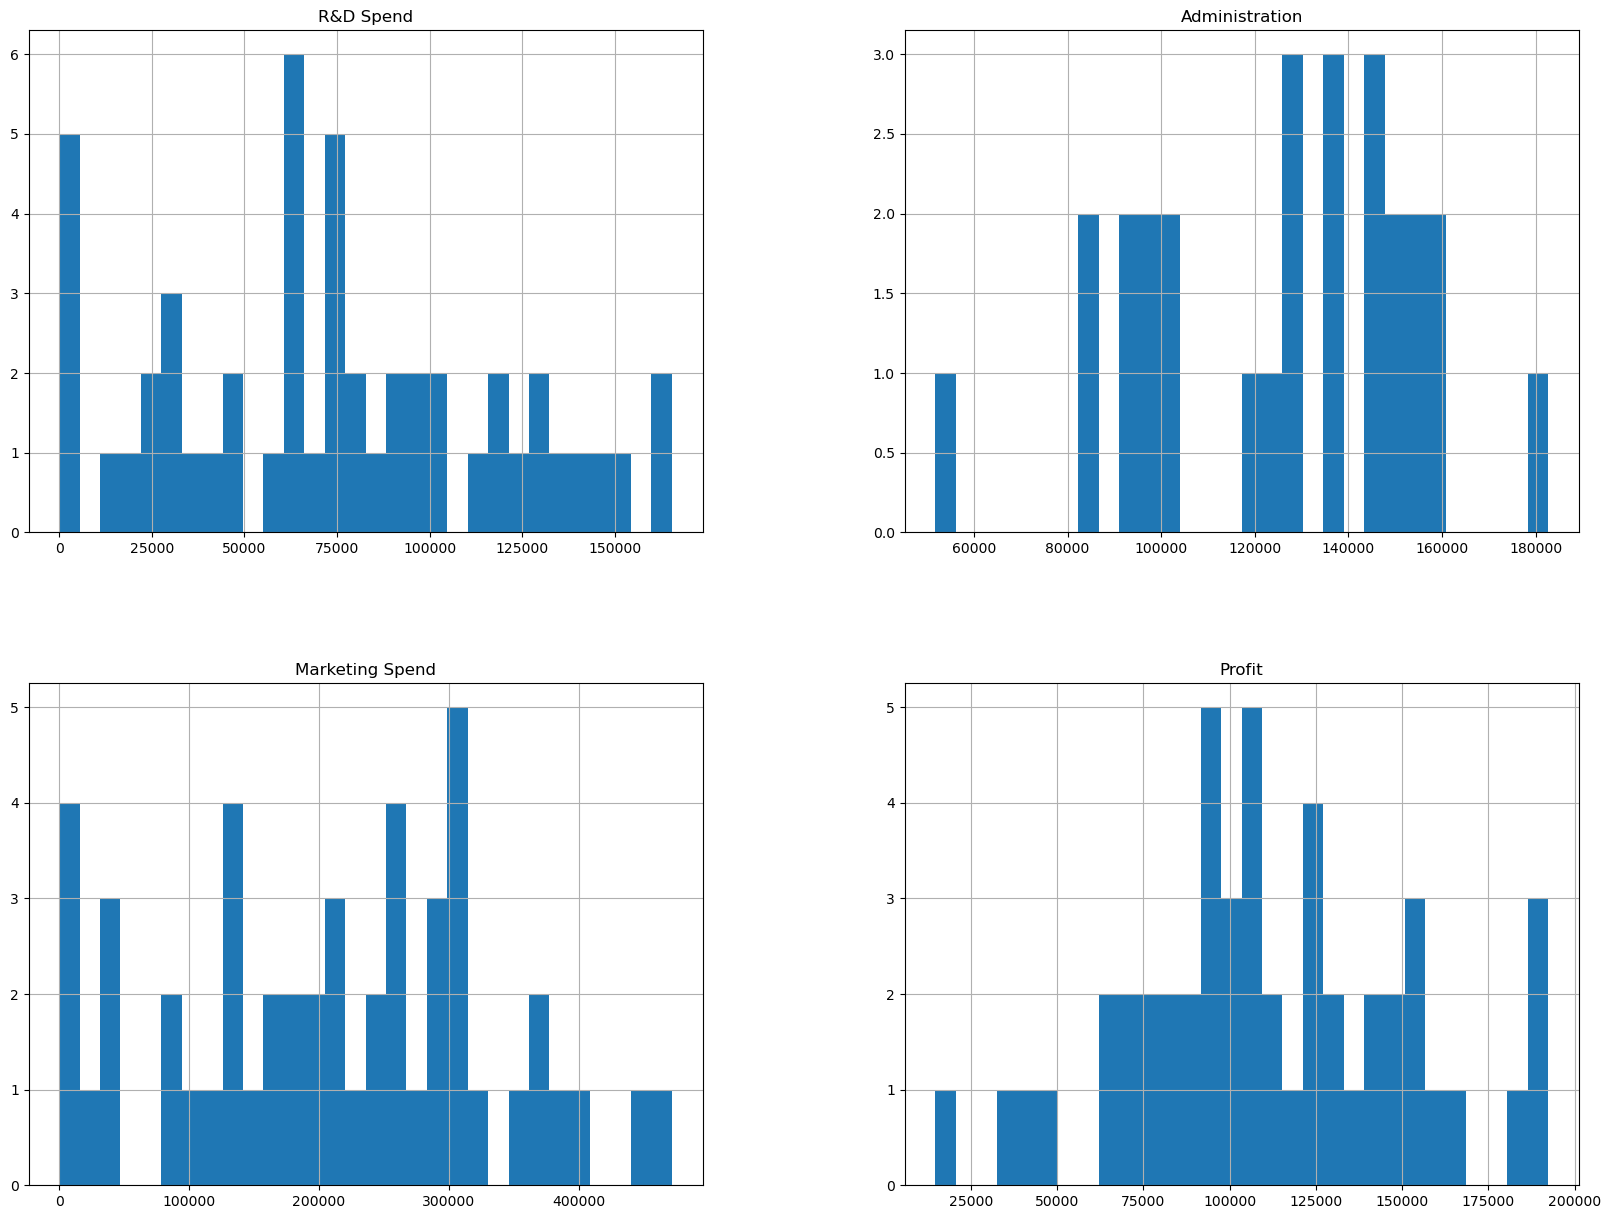

In [118]:
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

dataset_without_ID.hist(bins = 30, figsize = (20,15))
plt.show()

Из представленых графиков неясно, близко ли распределние данных в выборке к нормальному распределению.
##### Постоим графики плотности для дополнительной визуализации данных.

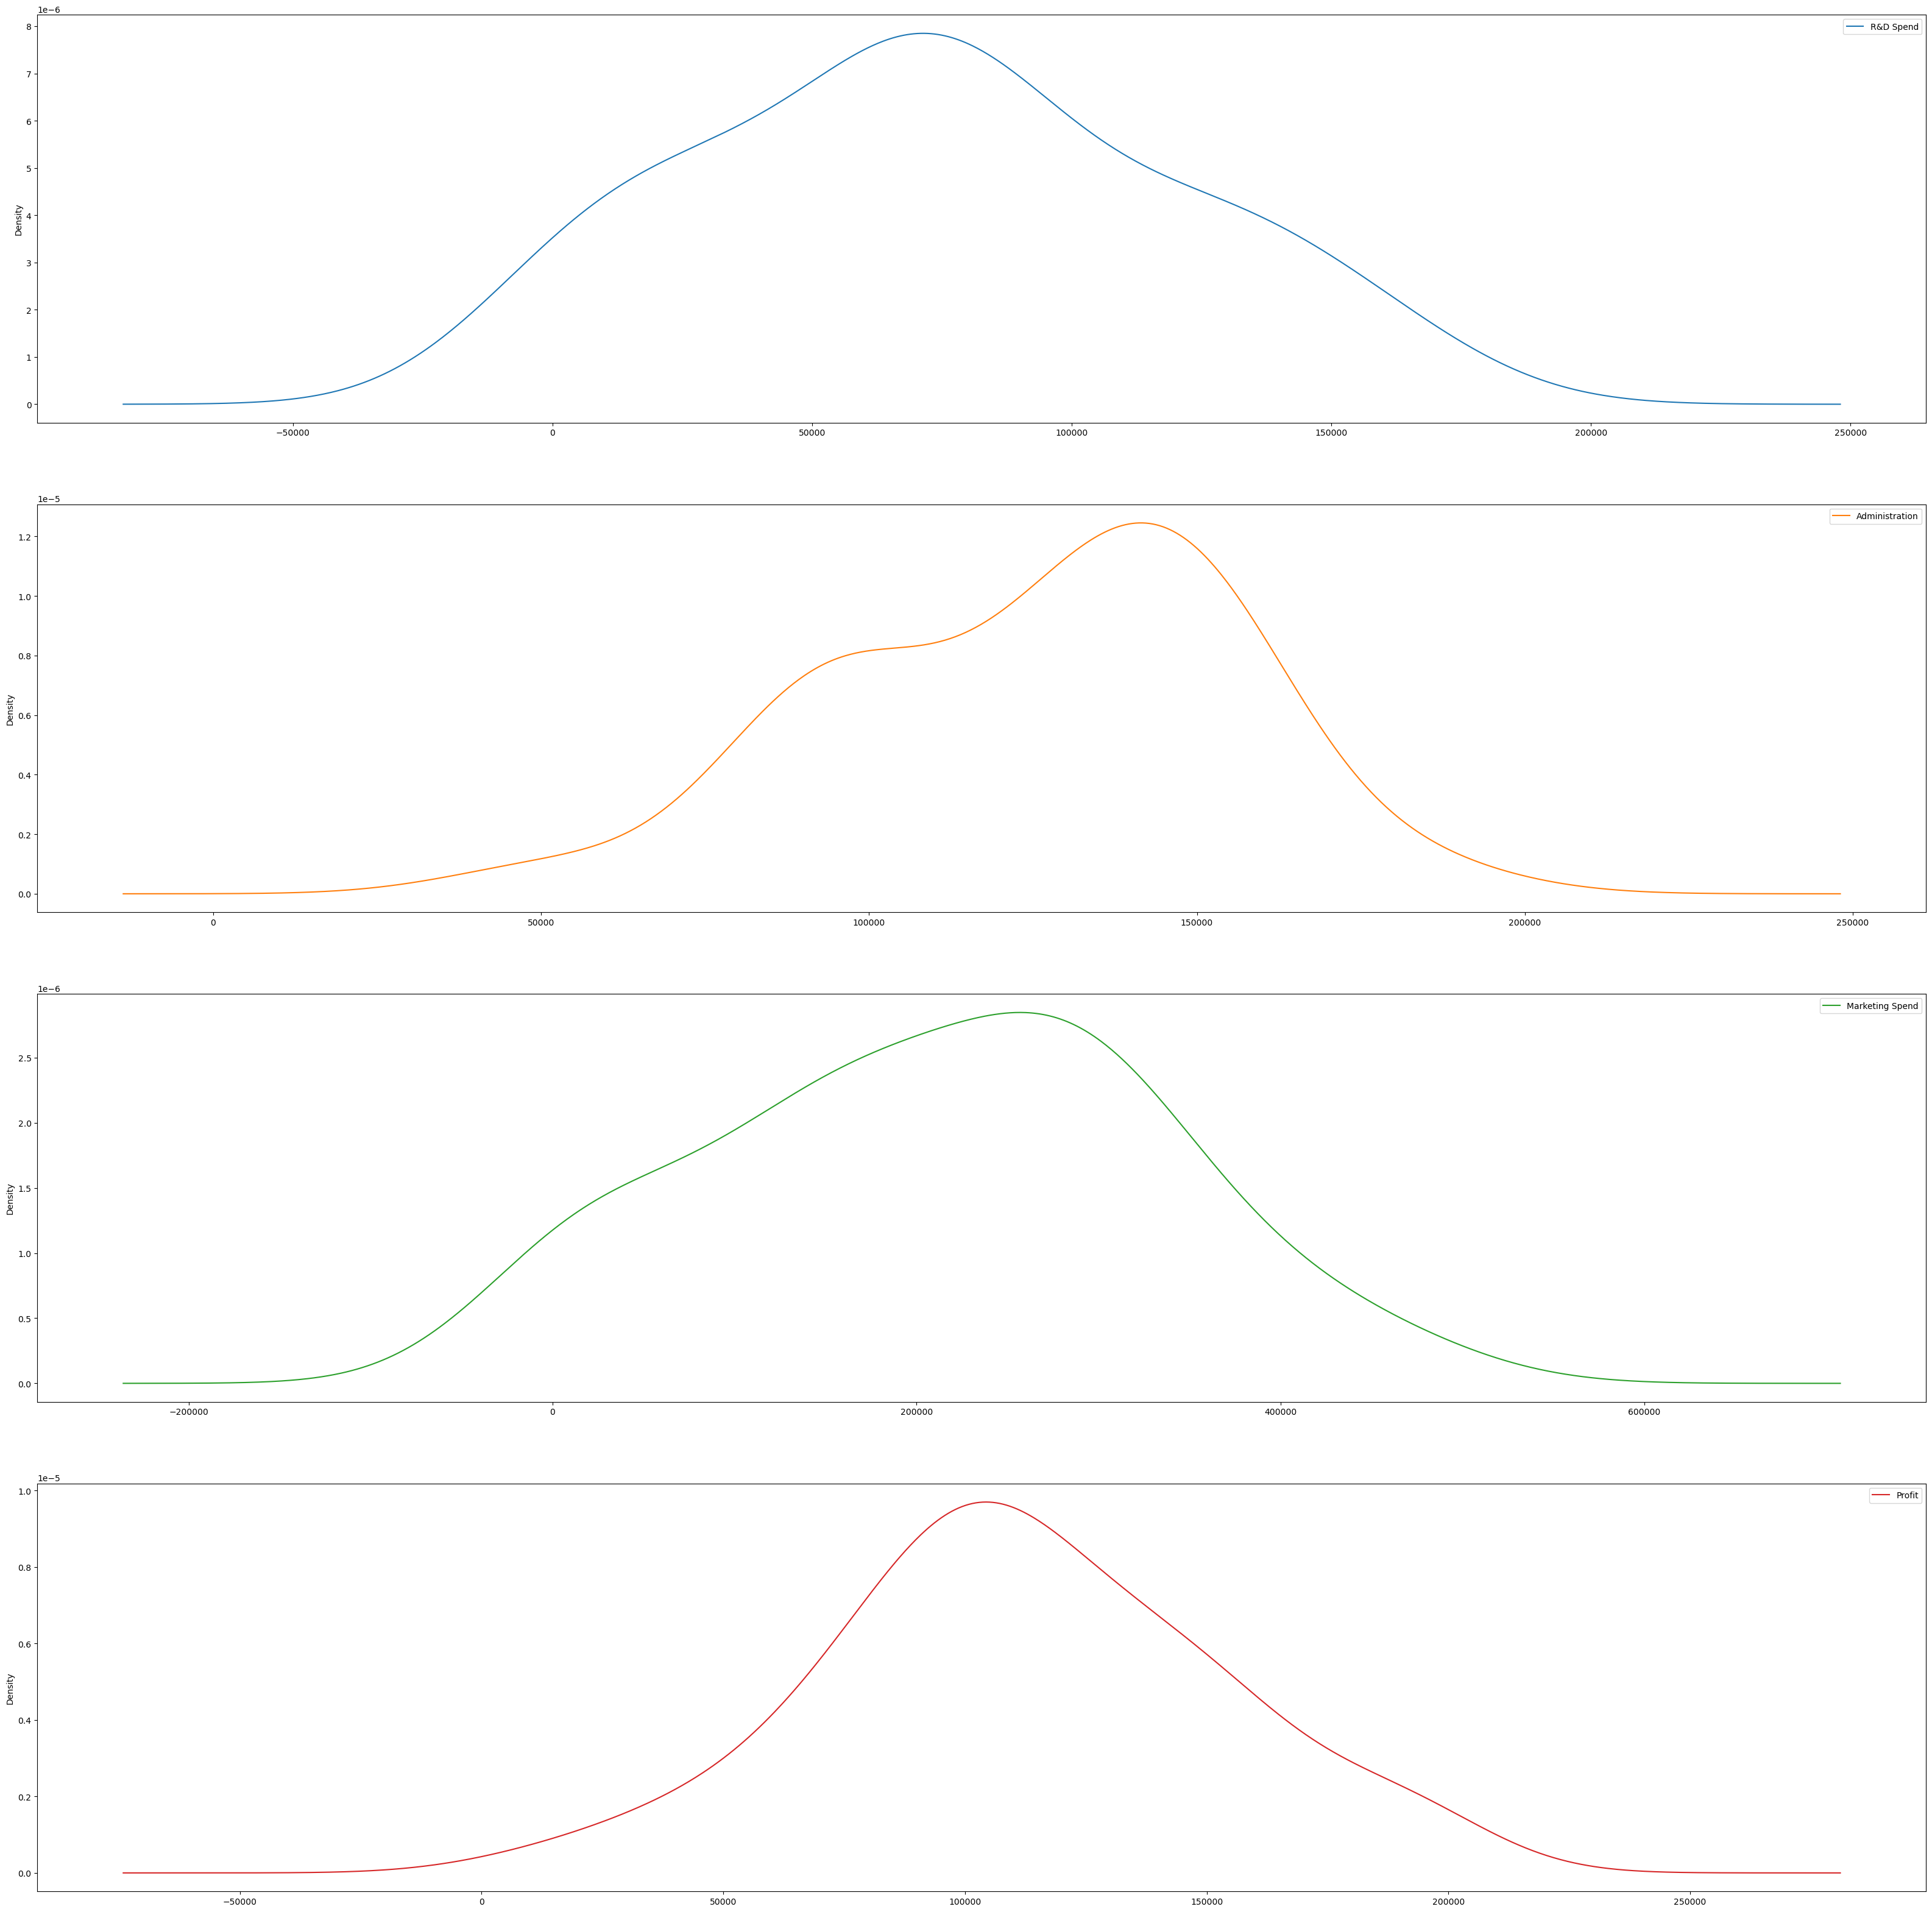

In [120]:
dataset_without_ID.plot(kind="density", subplots=True, sharex=False, figsize=(40,40))
plt.show()

Графики плотности близки к колоколу, что косвенно может указывать на нормальное распределение.

### Многомерная

##### Построение матрицы диаграммы рассеяния.

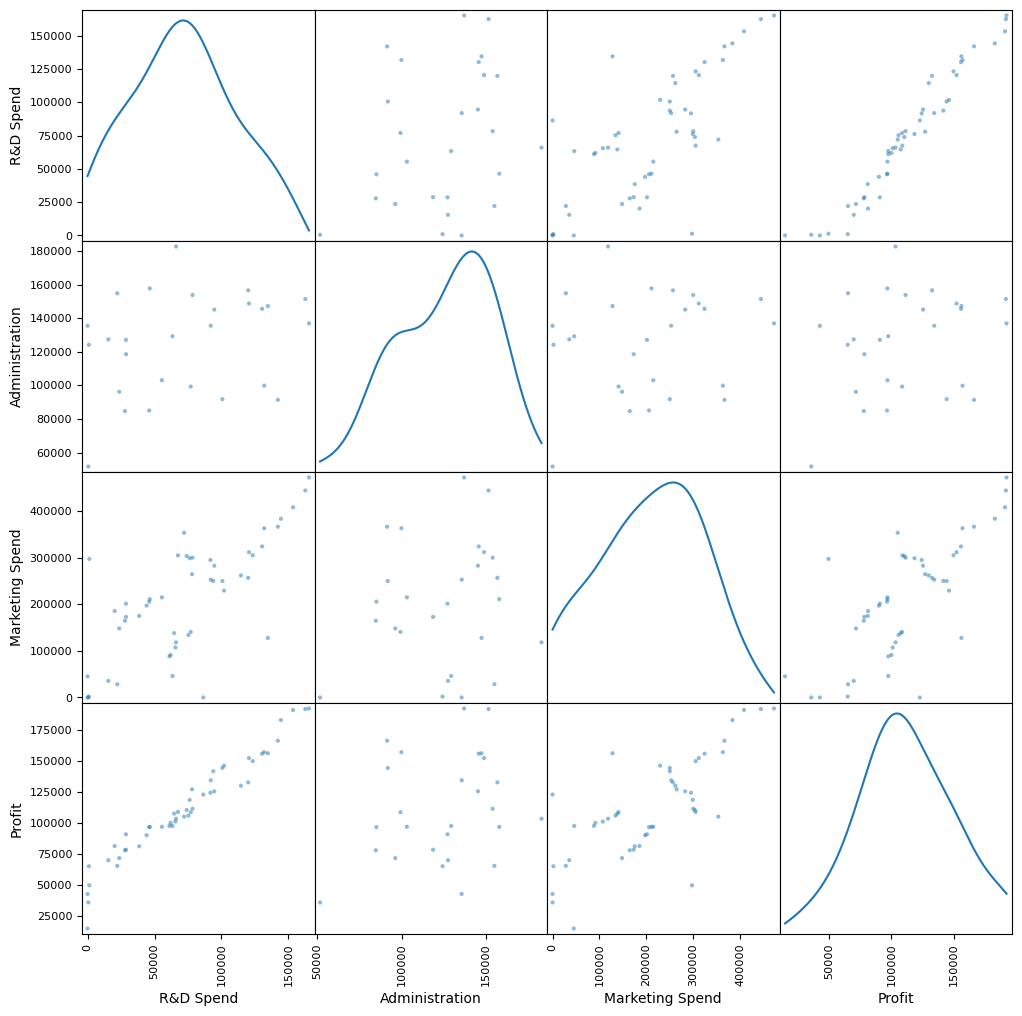

In [124]:
scatter_matrix(dataset_without_ID, figsize=(12,12), diagonal='density')
plt.show()

##### Построение корреляционной матрицы (без строкового атрибута State).

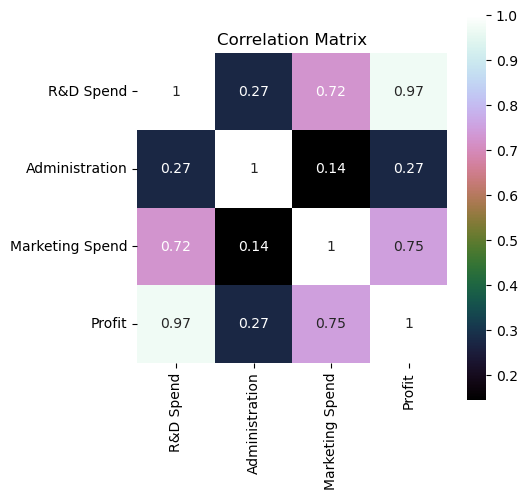

In [126]:
dataset_without_ID_and_State = dataset_without_ID.drop("State", axis=1)
dataset_corr = dataset_without_ID_and_State.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(dataset_corr, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

---
## 3.3. Поиск корреляционной зависимости между признаками
##### Вычисление стандартного коэффициента корреляции (Пирсона)

In [129]:
dataset_corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000,0.274,0.724,0.973
Administration,0.274,1.000,0.145,0.272
Marketing Spend,0.724,0.145,1.000,0.748
Profit,0.973,0.272,0.748,1.000


<br>
Просмотр данных по конкретному атрибуту ('Profit').

In [132]:
dataset_corr["Profit"].sort_values(ascending=False)

Profit             1.000
R&D Spend          0.973
Marketing Spend    0.748
Administration     0.272
Name: Profit, dtype: float64

Видно, что все атрибуты достаточно сильно связаны с прибылью(Profit).

---
---
# 4. Подготовка данных

---
## 4.1. Очистка данных

##### Восполним недостающие данные
Так как атрибут Administration имеет много нечисловых значений (NaN), заполним вместо них случайные значения около медианы с разбросом 10% от стандартного отклонения этого атрибута и заново вычислим стандартный коэффициент корреляции

In [141]:
# Определяем медиану и стандартное отклонение для столбца Administration
median_value = dataset['Administration'].median()
std_dev = dataset['Administration'].std() / 10 # Используем полное стандартное отклонение

# Функция для генерации случайных значений на основе стандартного отклонения
def random_fillna(x, median, std_dev):
    if np.isnan(x):
        return np.random.normal(median, std_dev)
    return x

# Применяем функцию к столбцу Administration
dataset['Administration'] = dataset['Administration'].apply(random_fillna, args=(median_value, std_dev))

# Обновляем все необходимые переменные
dataset_without_ID = dataset.drop("Unnamed: 0", axis=1)
dataset_without_ID_and_State = dataset_without_ID.drop("State", axis=1)

dataset_corr = dataset_without_ID_and_State.corr()
dataset_corr["Profit"].sort_values(ascending=False)

Profit             1.000
R&D Spend          0.973
Marketing Spend    0.748
Administration     0.224
Name: Profit, dtype: float64

---
## 4.2. Отбор существенных (информативных) признаков

##### Проведем оценку признаков используя библиотеку SkLearn

In [151]:
data_x = dataset_without_ID_and_State.iloc[:,:3]
data_y = dataset_without_ID_and_State["Profit"]
best_features = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.f_regression, k="all")
fit = best_features.fit(data_x, data_y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(data_x.columns)
feature_scores = pd.concat([columns, scores], axis = 1)
feature_scores

,0,0
0,R&D Spend,849.789
1,Administration,2.537
2,Marketing Spend,60.881


##### Очистим несущественные признаки
Из полученных данных видно, что признак Administration слабо влияет на признак Profit. Поэтому отметим этот признак как неиформативный и удалим его.

In [153]:
dataset_basic = dataset_without_ID_and_State
dataset_changed = dataset_without_ID_and_State.drop("Administration", axis=1)

---
## 4.3. Преобразование данных

##### Функция нормализации

In [ ]:
def normalize_dataset(dataset):
    numeric_columns = dataset.select_dtypes(include=[np.number]).columns  # Выбираем только числовые столбцы
    scaler = StandardScaler()
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
    return dataset
